# Anomaly detection

The goal of the project is to develop a method to carry out anomaly detection in IP traffic. In few words, the principle of the method is to build a profile of each IP address under the form of a small graph, called graphlet. We then build a model using Support Vector Machine to distinguish normal from malicious end hosts from an annotated trace. The last step will be to try to detect attack in a not annotated trace.

In [10]:
import sklearn
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

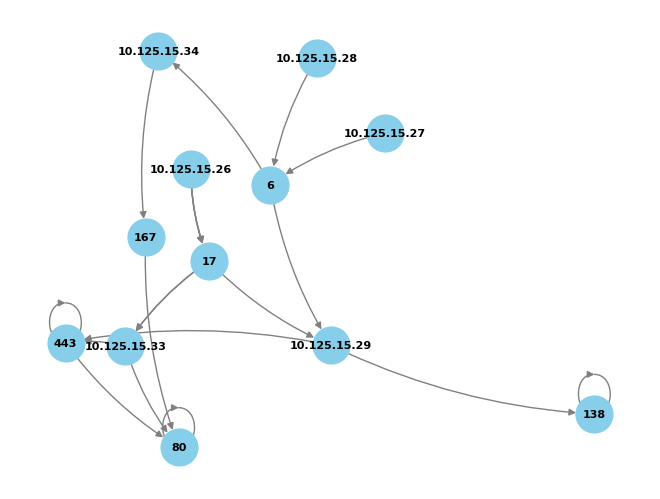

In [9]:
# 3. Build (by hand) the graphlets corresponding to the following network flows.
# format: srcIP protocol dstIP sPort dPort
def add_flow(graph, src_ip, protocol, dst_ip, src_port, dst_port):
    graph.add_node(src_ip)
    graph.add_node(protocol)
    graph.add_node(dst_ip)
    graph.add_node(src_port)
    graph.add_node(dst_port)

    graph.add_edge(src_ip, protocol)
    graph.add_edge(protocol, dst_ip)
    graph.add_edge(dst_ip, src_port)
    graph.add_edge(src_port, dst_port)
    
G = nx.MultiDiGraph()

flows = [
    ("10.125.15.26", 17, "10.125.15.29", 138, 138),
    ("10.125.15.26", 17, "10.125.15.33", 80, 80),
    ("10.125.15.27", 6, "10.125.15.34", 167, 80),
    ("10.125.15.28", 6, "10.125.15.29", 443, 443),
    ("10.125.15.26", 17, "10.125.15.33", 443, 80),
]

for flow in flows:
    add_flow(G, *flow)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8, edge_color='gray', arrows=True, connectionstyle='arc3,rad=0.1')
plt.show()

In [12]:
# 4. A traffic trace with annotated flows (normal or malicious) is provided in the file annotated-trace.txt. You will be using it to build your model of end hosts.
df = pd.read_csv("annotated-trace.csv", header=None)
df.head()

,0,1,2,3,4,5
0,102,386,1,53,79,normal
1,864,917,17,53,20,anomaly
2,940,128,6,68,443,normal
3,509,904,17,80,79,normal
4,906,749,17,80,80,normal
